In [ ]:
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!/bin/bash
!kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0


In [ ]:
!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,

    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    "/content/Training",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    "/content/Testing",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 4571 images belonging to 4 classes.
Found 262 images belonging to 4 classes.


In [ ]:
from keras.applications import VGG16

base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.4907 - loss: 1.0485 - val_accuracy: 0.6031 - val_loss: 1.0372
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.7849 - loss: 0.5575 - val_accuracy: 0.6336 - val_loss: 0.8822
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.8279 - loss: 0.4641 - val_accuracy: 0.6679 - val_loss: 0.7245
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.8551 - loss: 0.3719 - val_accuracy: 0.6641 - val_loss: 0.8005
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.8885 - loss: 0.2991 - val_accuracy: 0.7290 - val_loss: 0.5774
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9024 - loss: 0.2588 - val_accuracy: 0.7366 - val_loss: 0.7256
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9176 - loss: 0.2356 - val_accuracy: 0.7328 - val_loss: 0.7935
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9289 - loss: 0.1990 - val_accuracy: 0.7

In [ ]:
model.evaluate(val_generator)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7117 - loss: 1.0722


[1.1263501644134521, 0.7137404680252075]

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9351 - loss: 0.1740 - val_accuracy: 0.7863 - val_loss: 0.9314
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.9498 - loss: 0.1357 - val_accuracy: 0.8053 - val_loss: 0.7713
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9554 - loss: 0.1237 - val_accuracy: 0.7824 - val_loss: 0.7842
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9581 - loss: 0.1061 - val_accuracy: 0.8206 - val_loss: 0.6823
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9697 - loss: 0.0977 - val_accuracy: 0.8359 - val_loss: 0.7372
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9704 - loss: 0.0811 - val_accuracy: 0.8588 - val_loss: 0.5366
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9709 - loss: 0.0831 - val_accuracy: 0.8397 - val_loss: 0.8066
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.9742 - loss: 0.0822 - va

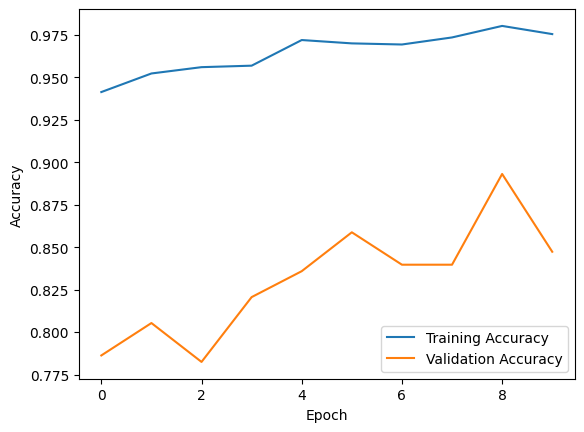

In [ ]:
import matplotlib.pyplot as plt
history = model.fit(train_generator, epochs=10, validation_data=val_generator)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('brain_tumor_model.h5')
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8412 - loss: 0.7480
Validation Accuracy: 85.11%
